In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [2]:
data_train = pd.read_csv("data set\\spliting data\\train part_1.csv")





data_train_1 = pd.read_csv("data set\spliting data\\train part_1.csv")
data_train_2 = pd.read_csv("data set\\spliting data\\train part_2.csv")
data_train_3 = pd.read_csv("data set\\spliting data\\train part_3.csv")
data_train_4 = pd.read_csv("data set\\spliting data\\train part_4.csv")
data_train_5 = pd.read_csv("data set\\spliting data\\train part_5.csv")





data_train=pd.concat([data_train_1, data_train_2,data_train_3,data_train_4,data_train_5], axis=0)




data_test= pd.read_csv("data set\\spliting data\\all_test.csv")
data_val= pd.read_csv("data set\\spliting data\\all_val.csv")

data_train = data_train.sample(frac=1).reset_index(drop=True)
data_test = data_test.sample(frac=1).reset_index(drop=True)
data_val = data_val.sample(frac=1).reset_index(drop=True)



In [3]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,fake,-346.051666,39.608204,-11.975864,-4.018073,-28.034328,-40.277908,-25.529850,-16.595245,-20.818565,...,-10.449461,-4.105315,-1.709363,3.012244,2.879487,-6.263638,1.364793,-3.492543,-1.757659,-4.644483
1,fake,-303.464996,24.547228,-3.636116,-12.298794,-38.041862,-38.363358,-22.894197,-12.076292,-16.085669,...,-12.216597,-6.514615,-6.648674,1.044630,-0.579769,-2.971673,1.753660,-2.186363,-0.788846,-1.943874
2,fake,-335.663788,33.805542,-20.103268,-7.363177,-23.622025,-34.377037,-28.102268,-13.238029,-12.731440,...,-10.812986,-7.281368,-5.003706,0.482301,-0.410610,-3.217422,1.499057,-2.457803,-1.341110,-2.476469
3,fake,-358.851410,42.482876,-4.290972,-5.941432,-15.195041,-21.195339,-17.902531,-4.197334,-15.689687,...,-1.024627,-3.639891,4.935487,1.046514,10.626634,-2.875583,6.926241,-4.474269,0.784024,-7.814086
4,fake,-332.461853,36.761818,-18.723978,-12.662133,-36.800228,-40.599072,-21.443787,-7.588496,-14.702394,...,-14.476424,-8.411809,-5.047117,-4.198995,0.689148,-7.803296,2.260641,-0.489292,-3.530922,-2.401791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117888,fake,-372.740814,41.968609,-13.416238,-10.419261,-18.992550,-17.385132,-18.682182,-2.655349,-12.443122,...,-3.678105,-4.667573,1.913183,0.313284,10.373997,-3.218129,7.569696,-3.079147,1.238337,-5.493374
117889,fake,-320.038849,33.082352,-10.115785,-11.676692,-32.621658,-39.488045,-26.868980,-8.187440,-14.885964,...,-7.257001,-9.016035,-2.840940,-0.144705,3.843362,-0.676425,2.520174,-0.647578,1.022539,-4.100697
117890,real,-275.258820,33.232624,-19.155657,-2.224198,-29.143221,-39.003536,-24.416954,-11.340054,-7.503270,...,-8.508763,-5.212563,-6.955703,0.835905,-5.133660,-3.148650,0.382811,-4.615654,-2.909033,-8.393060
117891,fake,-337.310883,36.990253,-9.427715,-12.168827,-30.545227,-31.075897,-38.567360,-12.045042,-2.515774,...,-8.559582,-12.842342,-7.299529,0.453443,-2.578540,-3.623248,3.440979,-1.514819,-1.355132,-3.878808


# Encoding

In [4]:
def encodeing(row):
    if row == "real":
      row = 0
    else :
      row =1
    return row

      

In [5]:
# data_train['label'] = data_train['label'].apply(encodeing)
# data_test['label']=data_test['label'].apply(encodeing)
# data_val['label']=data_test['label'].apply(encodeing)

In [5]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,fake,-346.051666,39.608204,-11.975864,-4.018073,-28.034328,-40.277908,-25.529850,-16.595245,-20.818565,...,-10.449461,-4.105315,-1.709363,3.012244,2.879487,-6.263638,1.364793,-3.492543,-1.757659,-4.644483
1,fake,-303.464996,24.547228,-3.636116,-12.298794,-38.041862,-38.363358,-22.894197,-12.076292,-16.085669,...,-12.216597,-6.514615,-6.648674,1.044630,-0.579769,-2.971673,1.753660,-2.186363,-0.788846,-1.943874
2,fake,-335.663788,33.805542,-20.103268,-7.363177,-23.622025,-34.377037,-28.102268,-13.238029,-12.731440,...,-10.812986,-7.281368,-5.003706,0.482301,-0.410610,-3.217422,1.499057,-2.457803,-1.341110,-2.476469
3,fake,-358.851410,42.482876,-4.290972,-5.941432,-15.195041,-21.195339,-17.902531,-4.197334,-15.689687,...,-1.024627,-3.639891,4.935487,1.046514,10.626634,-2.875583,6.926241,-4.474269,0.784024,-7.814086
4,fake,-332.461853,36.761818,-18.723978,-12.662133,-36.800228,-40.599072,-21.443787,-7.588496,-14.702394,...,-14.476424,-8.411809,-5.047117,-4.198995,0.689148,-7.803296,2.260641,-0.489292,-3.530922,-2.401791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117888,fake,-372.740814,41.968609,-13.416238,-10.419261,-18.992550,-17.385132,-18.682182,-2.655349,-12.443122,...,-3.678105,-4.667573,1.913183,0.313284,10.373997,-3.218129,7.569696,-3.079147,1.238337,-5.493374
117889,fake,-320.038849,33.082352,-10.115785,-11.676692,-32.621658,-39.488045,-26.868980,-8.187440,-14.885964,...,-7.257001,-9.016035,-2.840940,-0.144705,3.843362,-0.676425,2.520174,-0.647578,1.022539,-4.100697
117890,real,-275.258820,33.232624,-19.155657,-2.224198,-29.143221,-39.003536,-24.416954,-11.340054,-7.503270,...,-8.508763,-5.212563,-6.955703,0.835905,-5.133660,-3.148650,0.382811,-4.615654,-2.909033,-8.393060
117891,fake,-337.310883,36.990253,-9.427715,-12.168827,-30.545227,-31.075897,-38.567360,-12.045042,-2.515774,...,-8.559582,-12.842342,-7.299529,0.453443,-2.578540,-3.623248,3.440979,-1.514819,-1.355132,-3.878808


In [6]:
count = data_train['label'].value_counts()
print(count)


fake    107413
real     10480
Name: label, dtype: int64


In [7]:
# Assuming 'data' is your DataFrame
X_train = data_train.drop(columns='label').values  # Features
y_train = np.array(data_train['label'].values)  # Labels

# # Encode the labels using LabelEncoder (if not already done)
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)
# num_classes = len(label_encoder.classes_)

# # Split the data into training, validation, and test sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_val = data_val.drop(columns='label').values  # Features
y_val = np.array(data_val['label'].values)  # Labels

X_test = data_test.drop(columns='label').values  # Features
y_test = np.array(data_test['label'].values)  # Labels


In [8]:
import pandas as pd
y_train = pd.get_dummies(y_train)
y_val=pd.get_dummies(y_val)
y_test=pd.get_dummies(y_test)

In [9]:
y_train

,fake,real
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
117888,1,0
117889,1,0
117890,0,1
117891,1,0


In [11]:
# Reshape the data to match the LSTM input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

from keras.layers import Conv1D, MaxPooling1D, Flatten

import tensorflow as tf
# gpus = tf.config.list_physical_devices('GPU')
# tf.config.set_visible_devices(gpus[0], 'GPU')
# logical_gpus = tf.config.list_logical_devices('GPU')
# print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")

model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add a max-pooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the output
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 23, 128)           512       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 11, 128)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1408)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                90176     
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 90,818
Trainable params: 90,818
Non-trainable params: 0
__________________________________________________

In [12]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

461/461 - 1s - loss: 0.2352 - accuracy: 0.9154 - 1s/epoch - 3ms/step
Test Accuracy: 91.54%


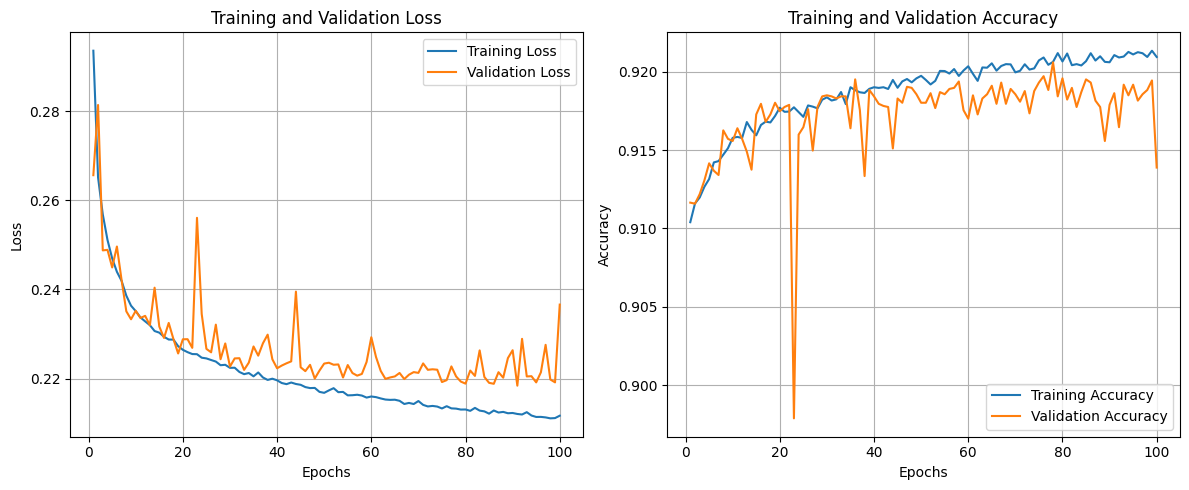

In [13]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [14]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


461/461 [==============================] - 1s 1ms/step


In [15]:
y_test

,fake,real
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
14731,1,0
14732,1,0
14733,1,0
14734,1,0


In [16]:
y_ture=np.argmax(y_test.values, axis=1)


In [17]:
y_ture

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Test f1_score : 35.56%


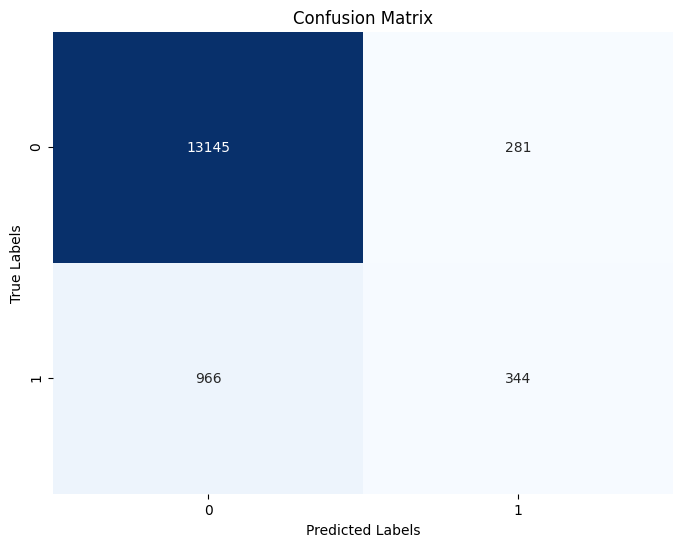

In [18]:


from sklearn.metrics import f1_score
f1=f1_score(y_ture, y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(y_ture, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [19]:
y_pred_classes

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
y_test

,fake,real
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
14731,1,0
14732,1,0
14733,1,0
14734,1,0


# eraly stopping

In [21]:

from keras.layers import Conv1D, MaxPooling1D, Flatten

import tensorflow as tf
# gpus = tf.config.list_physical_devices('GPU')
# tf.config.set_visible_devices(gpus[0], 'GPU')
# logical_gpus = tf.config.list_logical_devices('GPU')
# print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")

model = Sequential()
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
# Add a 1D convolutional layer
model.add(Conv1D(128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add a max-pooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the output
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val),callbacks=[callback])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 23, 128)           512       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 11, 128)          0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1408)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                90176     
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 90,818
Trainable params: 90,818
Non-trainable params: 0
__________________________________________________

In [22]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

461/461 - 1s - loss: 0.2262 - accuracy: 0.9173 - 1s/epoch - 2ms/step
Test Accuracy: 91.73%


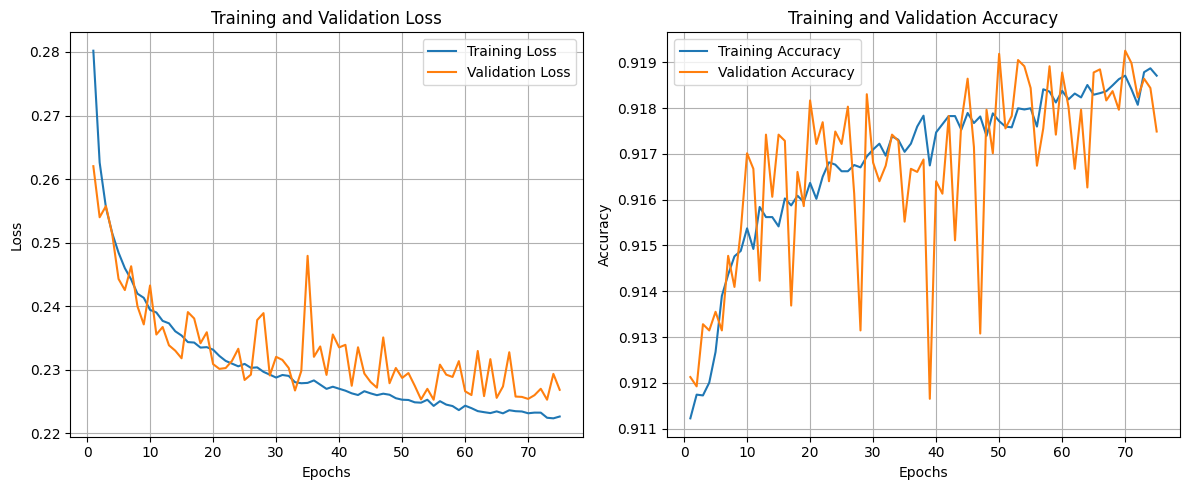

In [23]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


461/461 [==============================] - 1s 1ms/step
Test f1_score : 16.33%


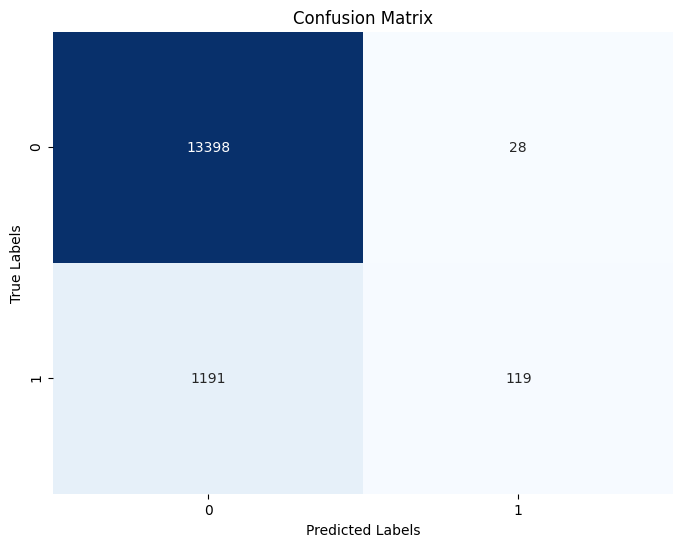

In [24]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score 

from sklearn.metrics import f1_score
f1=f1_score(np.argmax(np.array(y_test), axis=1), y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(np.argmax(np.array(y_test), axis=1), y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()